In [1]:
#import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score

In [2]:
#load data
df = pd.read_csv("stroke_data.csv")

## Exploratory analysis and data preparation

In [3]:
#first look at the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#total number of rows and columns
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The dataset consists of 10 metrics for a total of 5110 patients. We have demographic data (gender, age, marital status, type of work and residence) as well as health data including hypertension, heart disease, average glucose level, body mass index (BMI), smoking status and whether the patient has experienced a stroke.

In [6]:
#Let's see how the data spread between people having experienced of a stroke or not
#using count nb of strokes vs not stroke
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

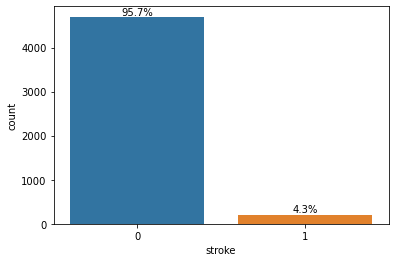

In [129]:
#"A picture is worth a thousand words"
ncount = len(df['stroke'])
ax = sns.countplot(x=df['stroke'])
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.savefig('stroke_count.png')

In [10]:
#percentage of people having had a stroke in this dataset
len(df[df['stroke'] == 1])/len(df)*100

4.87279843444227

We can see that the dataset is very imbalanced. It is important to keep it in mind when cleaning and training.

### Checking for missing values

In [11]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 null values in the 'bmi' column.

In [12]:
# dropping the missing values
df.dropna(inplace = True)

In [13]:
#let's check 
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


After removing the null values, we have left with 4909 entries. 

### Drop the id column
The ID column was useful to identify the patients but it will not have any impact on the models, so we can drop it.

In [15]:
df.drop(columns=['id'], inplace=True)

In [16]:
#checking
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Exploring each variable

#### Gender

In [17]:
#Let's see how the data spread between male and female
df['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

There is 1 row with "Other", we can drop it. 

In [18]:
#Dropping 'Other' by selecting rows where gender 1= Other
df = df.loc[df["gender"] != 'Other']

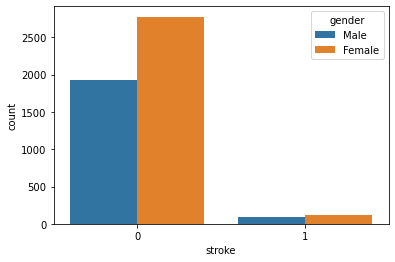

In [19]:
#Visualise stroke counts gender wise
sns.countplot(x=df["stroke"], hue=df["gender"])
plt.savefig('stroke_gender.png')

#### Age

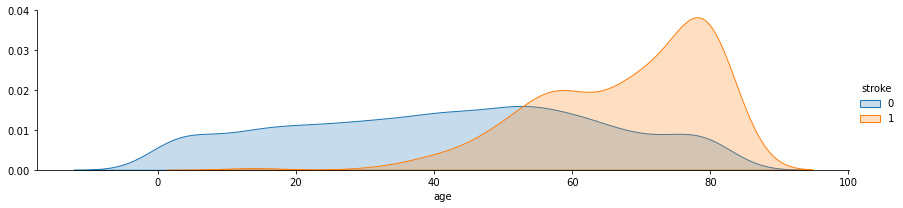

In [20]:
#Visualise the spread of the mean for the age variable
fig = sns.FacetGrid(data=df, hue="stroke", aspect=4)
fig.map(sns.kdeplot, "age", shade=True)
fig.add_legend()
plt.savefig('stroke_age.png')

It's not suprising to see that there is a higher risk of stroke when the patient get older.

#### Hypertension

In [21]:
#count hypertension
df['hypertension'].value_counts()

0    4457
1     451
Name: hypertension, dtype: int64

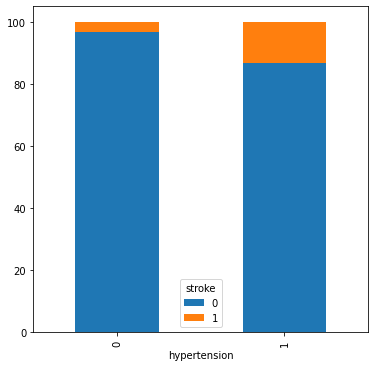

In [22]:
#Visualise proportion of people having hypertension between the 2 groups
df_hypertension = df.groupby(['hypertension','stroke'])['hypertension'].count()
df_hypertension_total = df.groupby(['hypertension'])['hypertension'].count()
df_hypertension_fig = df_hypertension / df_hypertension_total * 100
df_hypertension_fig = df_hypertension_fig.unstack()
df_hypertension_fig.plot.bar(stacked=True, figsize=(6,6), width=0.5)
plt.savefig('stroke_hypertension.png')

In proportion, there are more people experiencing stroke in the group with hypertension.

#### Heart disease

In [23]:
#count heart disease
df['heart_disease'].value_counts()

0    4665
1     243
Name: heart_disease, dtype: int64

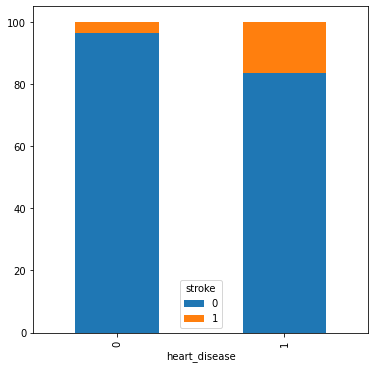

In [25]:
#Visualise proportion of people having heart disease between the 2 groups
df_heart = df.groupby(['heart_disease','stroke'])['heart_disease'].count()
df_heart_total = df.groupby(['heart_disease'])['heart_disease'].count()
df_heart_fig = df_heart / df_heart_total * 100
df_heart_fig = df_heart_fig.unstack()
df_heart_fig.plot.bar(stacked=True, figsize=(6,6), width=0.5)
plt.savefig('stroke_heart.png')

Same constatation as with the group having hypertension, there is a larger proportion of people experiencing stroke.

#### Marital status

In [27]:
#count ever_married
df['ever_married'].value_counts()

Yes    3204
No     1704
Name: ever_married, dtype: int64

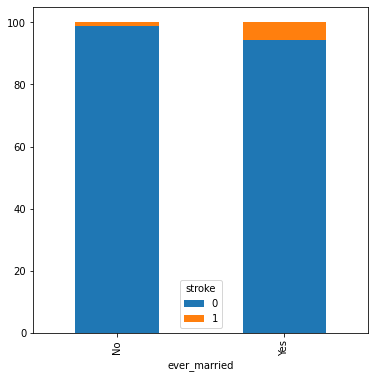

In [28]:
#plotting stacked bar to see the proportion of people having stroke in this group
df_married = df.groupby(['ever_married','stroke'])['ever_married'].count()
df_married_total = df.groupby(['ever_married'])['ever_married'].count()
df_married_fig = df_married / df_married_total * 100
df_married_fig = df_married_fig.unstack()
df_married_fig.plot.bar(stacked=True, figsize=(6,6), width=0.5)
plt.savefig('stroke_married.png')

The larger proportion of people experiencing stroke for this population can be correlated with what we have seen for age.

#### Work type

In [29]:
#count work_type
df['work_type'].value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

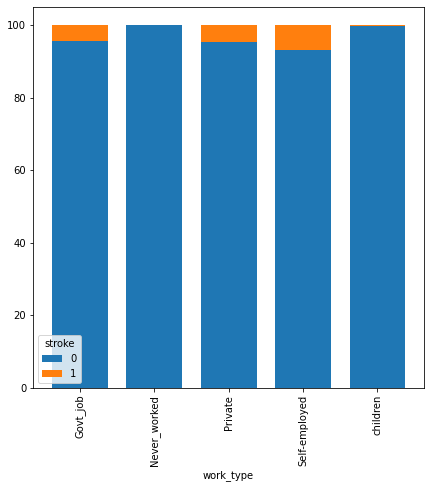

In [30]:
df_work = df.groupby(['work_type','stroke'])['work_type'].count()
df_work_total = df.groupby(['work_type'])['work_type'].count()
df_work_fig = df_work / df_work_total * 100
df_work_fig = df_work_fig.unstack()
df_work_fig.plot.bar(stacked=True, figsize=(7,7), width=0.75)
plt.savefig('stroke_work.png')

#### Residence type

In [31]:
#count residence_type
df['Residence_type'].value_counts()

Urban    2490
Rural    2418
Name: Residence_type, dtype: int64

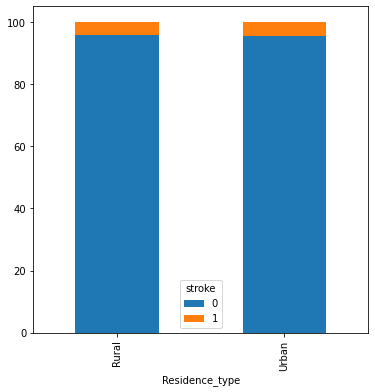

In [32]:
df_residence = df.groupby(['Residence_type','stroke'])['Residence_type'].count()
df_residence_total = df.groupby(['Residence_type'])['Residence_type'].count()
df_residence_fig = df_residence / df_residence_total * 100
df_residence_fig = df_residence_fig.unstack()
df_residence_fig.plot.bar(stacked=True, figsize=(6,6), width=0.5)
plt.savefig('stroke_residence.png')

Environmental factors can be a risk factor for stroke but there is no difference in this dataset. 

#### Glucose level

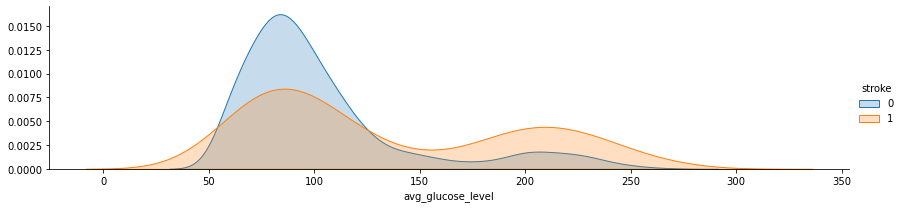

In [33]:
#spread avg_glucose_level
fig = sns.FacetGrid(data=df, hue="stroke", aspect=4)
fig.map(sns.kdeplot, "avg_glucose_level", shade=True)
fig.add_legend()

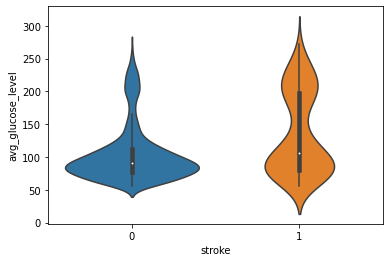

In [34]:
sns.violinplot(x="stroke", y="avg_glucose_level", data=df)
plt.savefig('stroke_glucose.png')

The distribution of average glucose level between the two classes is almost similar. There are only a slightly difference for the average glucose level above 150 where more people is experiencing stroke.

#### BMI

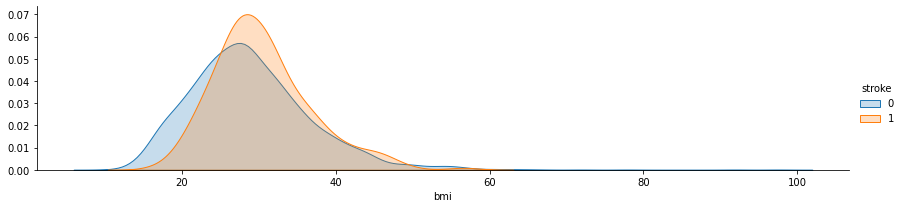

In [35]:
#spread bmi
fig = sns.FacetGrid(data=df, hue="stroke", aspect=4)
fig.map(sns.kdeplot, "bmi", shade=True)
fig.add_legend()
plt.savefig('stroke_bmi.png')

There is no real difference between the two groups in terms of BMI.

#### Smoking status

In [36]:
#count smoking_status
df['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

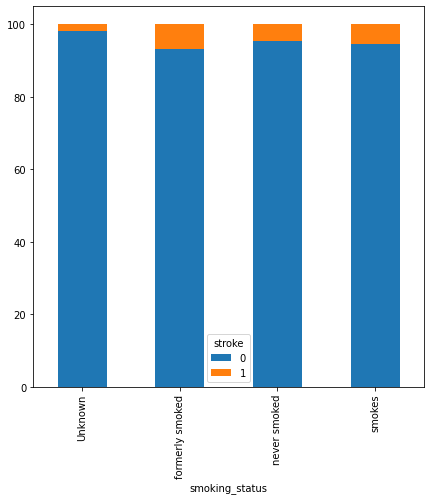

In [37]:
df_smoking = df.groupby(['smoking_status','stroke'])['smoking_status'].count()
df_smoking_total = df.groupby(['smoking_status'])['smoking_status'].count()
df_smoking_fig = df_smoking / df_smoking_total * 100
df_smoking_fig = df_smoking_fig.unstack()
df_smoking_fig.plot.bar(stacked=True, figsize=(7,7), width=0.5)
plt.savefig('stroke_smoking.png')

The graph confirms that smoking is a risk factor for stroke. 

### Encoding categorical data

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
enc=LabelEncoder()

In [40]:
#encoding gender variable
df['gender']=enc.fit_transform(df['gender'])

In [41]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,1,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [42]:
#encoding marital status
df['ever_married']=enc.fit_transform(df['ever_married'])

In [43]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,1,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [44]:
# Encode variables with more than 2 Classes
df = pd.get_dummies(df, columns= [i for i in df.columns if df[i].dtypes=='object'],drop_first=True)

In [45]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,1,0,1,0,0,1,1,0,0
2,1,80.0,0,1,1,105.92,32.5,1,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,171.23,34.4,1,0,1,0,0,1,0,0,1
4,0,79.0,1,0,1,174.12,24.0,1,0,0,1,0,0,0,1,0
5,1,81.0,0,0,1,186.21,29.0,1,0,1,0,0,1,1,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4908 non-null   int64  
 1   age                             4908 non-null   float64
 2   hypertension                    4908 non-null   int64  
 3   heart_disease                   4908 non-null   int64  
 4   ever_married                    4908 non-null   int64  
 5   avg_glucose_level               4908 non-null   float64
 6   bmi                             4908 non-null   float64
 7   stroke                          4908 non-null   int64  
 8   work_type_Never_worked          4908 non-null   uint8  
 9   work_type_Private               4908 non-null   uint8  
 10  work_type_Self-employed         4908 non-null   uint8  
 11  work_type_children              4908 non-null   uint8  
 12  Residence_type_Urban            49

We have now 4908 entries for 16 variables and all our data are either in numerical format so that we can perform the training later.


### Further exploratory analysis and visualisation

In [47]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000
mean,0.409739,42.868810,0.091891,0.049511,0.652812,105.297402,28.89456,0.042584,0.004482,0.572535,0.157905,0.136716,0.507335,0.170334,0.377343,0.150163
std,0.491836,22.556128,0.288901,0.216954,0.476125,44.425550,7.85432,0.201937,0.066808,0.494761,0.364689,0.343582,0.499997,0.375964,0.484771,0.357268
min,0.000000,0.080000,0.000000,0.000000,0.000000,55.120000,10.30000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,77.067500,23.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,91.680000,28.10000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,113.495000,33.10000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,271.740000,97.60000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


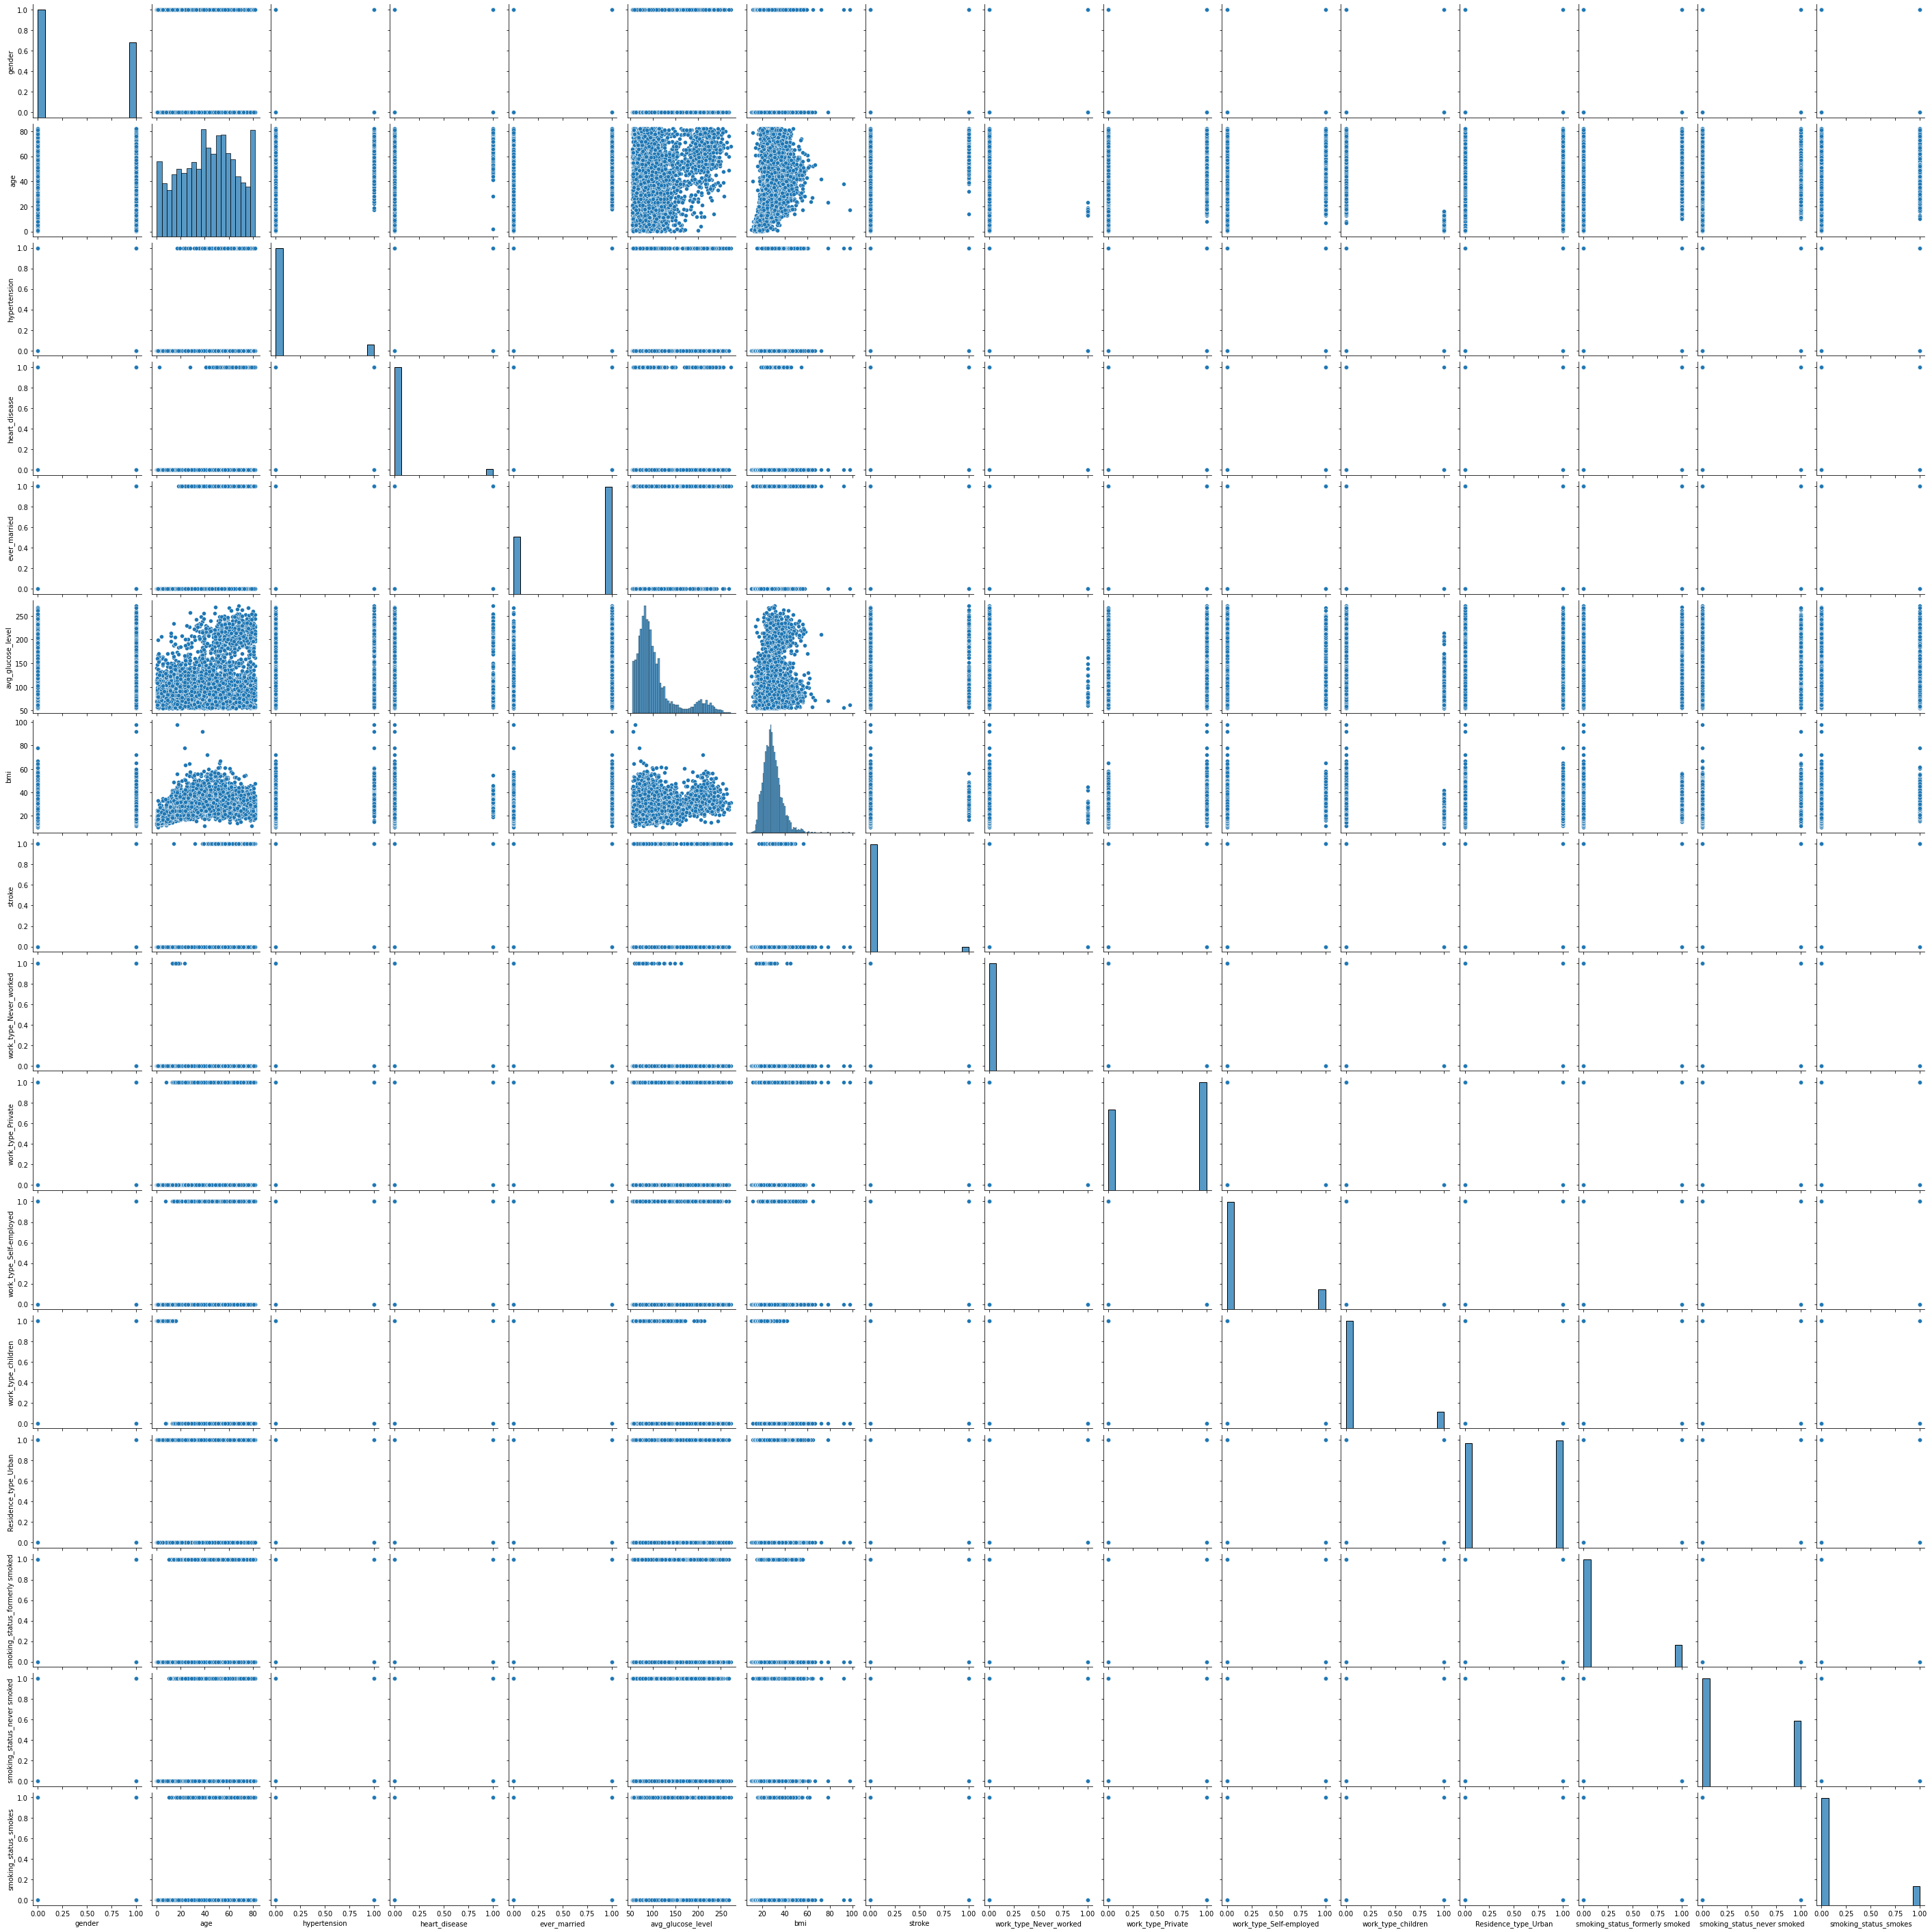

In [48]:
sns.pairplot(df)
plt.savefig('stroke_pairplot.png')

In [49]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
gender,1.000000,-0.030280,0.021811,0.082950,-0.036380,0.053161,-0.026164,0.006904,0.012316,-0.038831,-0.022210,0.091732,-0.004351,0.039078,-0.093881,0.011623
age,-0.030280,1.000000,0.274395,0.257104,0.680742,0.236000,0.333314,0.232313,-0.079399,0.120169,0.327306,-0.635044,0.010795,0.242874,0.124273,0.076743
hypertension,0.021811,0.274395,1.000000,0.115978,0.162350,0.180614,0.167770,0.142503,-0.021345,-0.004581,0.111770,-0.126590,-0.001140,0.062252,0.066671,0.028188
heart_disease,0.082950,0.257104,0.115978,1.000000,0.111203,0.154577,0.041322,0.137929,-0.015315,-0.000239,0.081466,-0.088092,-0.002409,0.071477,-0.020722,0.048667
ever_married,-0.036380,0.680742,0.162350,0.111203,1.000000,0.151657,0.341553,0.105051,-0.092012,0.157102,0.191389,-0.545687,0.004707,0.176745,0.105062,0.106479
avg_glucose_level,0.053161,0.236000,0.180614,0.154577,0.151657,1.000000,0.175672,0.138984,-0.013980,0.009124,0.069133,-0.101122,-0.007441,0.073907,0.032225,0.011055
bmi,-0.026164,0.333314,0.167770,0.041322,0.341553,0.175672,1.000000,0.042341,-0.028615,0.208205,0.072634,-0.448779,-0.000293,0.107463,0.107847,0.088261
stroke,0.006904,0.232313,0.142503,0.137929,0.105051,0.138984,0.042341,1.000000,-0.014152,0.014972,0.055338,-0.080990,0.005988,0.057443,0.010690,0.021513
work_type_Never_worked,0.012316,-0.079399,-0.021345,-0.015315,-0.092012,-0.013980,-0.028615,-0.014152,1.000000,-0.077658,-0.029057,-0.026703,0.023419,-0.030404,0.035857,-0.028206
work_type_Private,-0.038831,0.120169,-0.004581,-0.000239,0.157102,0.009124,0.208205,0.014972,-0.077658,1.000000,-0.501151,-0.460556,-0.016980,0.024498,0.111023,0.099199


The variables that have the highest correlation score with stroke are: age, heart disease, glucose level and hypertension, which is what we suspected.

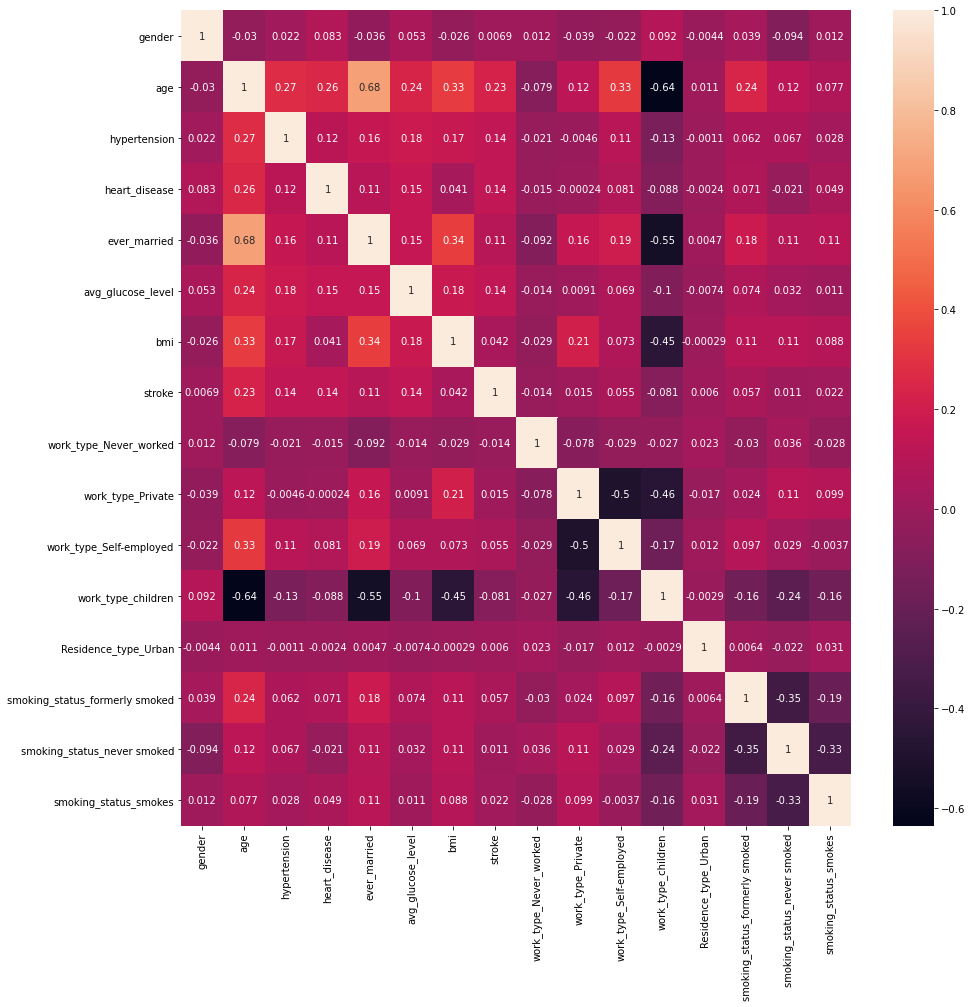

In [50]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.savefig('stroke_corr_heat.png')

Nevertheless, the coefficients are very low (between .14 and .2)

## Training

### 1. Set the independent (X) and the dependent variable (y)

In [51]:
y=df['stroke'].ravel()

In [52]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [53]:
X=df.drop('stroke', axis=1)

In [54]:
X

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,0,1,0,0,1,1,0,0
2,1,80.0,0,1,1,105.92,32.5,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,171.23,34.4,0,1,0,0,1,0,0,1
4,0,79.0,1,0,1,174.12,24.0,0,0,1,0,0,0,1,0
5,1,81.0,0,0,1,186.21,29.0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,103.08,18.6,0,0,0,1,0,0,0,0
5106,0,81.0,0,0,1,125.20,40.0,0,0,1,0,1,0,1,0
5107,0,35.0,0,0,1,82.99,30.6,0,0,1,0,0,0,1,0
5108,1,51.0,0,0,1,166.29,25.6,0,1,0,0,0,1,0,0


In [56]:
#Scaling X 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [60]:
X_scale=scaler.fit_transform(X)

In [61]:
X_scale[:5]

array([[1.        , 0.81689453, 0.        , 1.        , 1.        ,
        0.80126489, 0.30126002, 0.        , 1.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ],
       [1.        , 0.97558594, 0.        , 1.        , 1.        ,
        0.23451205, 0.25429553, 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.59716797, 0.        , 0.        , 1.        ,
        0.53600776, 0.27605956, 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ],
       [0.        , 0.96337891, 1.        , 0.        , 1.        ,
        0.54934909, 0.15693013, 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ],
       [1.        , 0.98779297, 0.        , 0.        , 1.        ,
        0.60516111, 0.21420389, 0.        , 1.        , 0.        ,
        0.        , 1.        , 1.        , 

### 2. Split the data into training and testing sets 

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, stratify=y, shuffle=True, random_state=42)

In [65]:
X_train

array([[1.        , 0.74365234, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.82910156, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.84130859, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.31640625, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.35302734, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.68261719, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [66]:
X_test

array([[0.        , 0.4140625 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.36523438, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.01806641, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.81689453, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.52392578, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [67]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

(array([3289.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         146.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

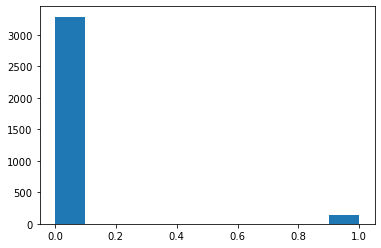

In [68]:
plt.hist(y_train)

In [69]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

(array([1410.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          63.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

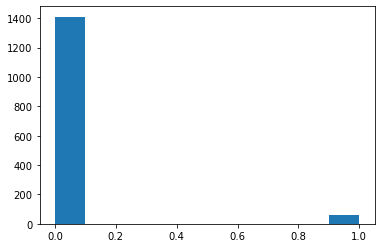

In [70]:
plt.hist(y_test)

### 3. Creating models

#### Logistic regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lr=LogisticRegression(random_state=42)

In [73]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [74]:
y_pred_lr=lr.predict(X_test)

In [75]:
accuracy_score(y_test, y_pred_lr)

0.9572301425661914

In [76]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1410
           1       0.00      0.00      0.00        63

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.92      0.96      0.94      1473



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1. With imbalanced data, the accuracy is not a metric that we can take into account because it is based on the the larger part of the target. In other words, this model is very accurate predincting when a people is not having a stroke, which is obviously what we don't need...
2. The poor result in class 1 of the target is expected because of the imbalanced dataset as well as the limited correlation among the variables. 

#### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf=RandomForestClassifier(random_state=42)

In [79]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
y_pred_rf=rf.predict(X_test)

In [81]:
accuracy_score(y_test, y_pred_rf)

0.955193482688391

In [82]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1410
           1       0.00      0.00      0.00        63

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.92      0.96      0.94      1473



In [83]:
confusion_matrix(y_test, y_pred_rf)

array([[1407,    3],
       [  63,    0]])

#### Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dt=DecisionTreeClassifier(random_state=42)

In [86]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [87]:
y_pred_dt=dt.predict(X_test)

In [88]:
accuracy_score(y_test, y_pred_dt)

0.923285811269518

In [89]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1410
           1       0.10      0.10      0.10        63

    accuracy                           0.92      1473
   macro avg       0.53      0.53      0.53      1473
weighted avg       0.92      0.92      0.92      1473



In [90]:
confusion_matrix(y_test, y_pred_dt)

array([[1354,   56],
       [  57,    6]])

#### KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn=KNeighborsClassifier()

In [93]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [94]:
y_pred_knn=knn.predict(X_test)

In [95]:
accuracy_score(y_test, y_pred_knn)

0.955193482688391

In [96]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1410
           1       0.20      0.02      0.03        63

    accuracy                           0.96      1473
   macro avg       0.58      0.51      0.50      1473
weighted avg       0.93      0.96      0.94      1473



In [97]:
confusion_matrix(y_test, y_pred_knn)

array([[1406,    4],
       [  62,    1]])

### Handling imbalanced data with sampling

In [98]:
#Using over-sampling method
from imblearn.over_sampling import SMOTE

In [99]:
sm = SMOTE()
X_oversampled, y_oversampled = sm.fit_resample(X, y)

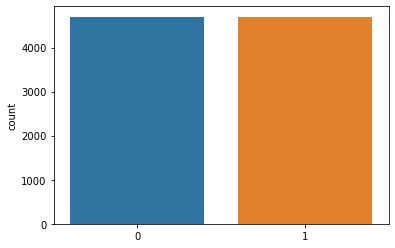

In [101]:
#data after oversampling
sns.countplot(x = y_oversampled, data = df)
plt.savefig('stroke_oversampled.png')

In [102]:
#train again with the new data
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size = 0.2, random_state = 42)

In [104]:
#Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(confusion_matrix(lr_pred, y_test))
print(classification_report(lr_pred, y_test))

[[809 143]
 [113 815]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       952
           1       0.85      0.88      0.86       928

    accuracy                           0.86      1880
   macro avg       0.86      0.86      0.86      1880
weighted avg       0.86      0.86      0.86      1880



In [110]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print(confusion_matrix(dt_pred, y_test))
print(classification_report(dt_pred, y_test))

[[857  63]
 [ 65 895]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       920
           1       0.93      0.93      0.93       960

    accuracy                           0.93      1880
   macro avg       0.93      0.93      0.93      1880
weighted avg       0.93      0.93      0.93      1880



In [108]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(confusion_matrix(knn_pred, y_test))
print(classification_report(knn_pred, y_test))

[[749  16]
 [173 942]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       765
           1       0.98      0.84      0.91      1115

    accuracy                           0.90      1880
   macro avg       0.90      0.91      0.90      1880
weighted avg       0.91      0.90      0.90      1880



In [105]:
#Random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(confusion_matrix(rf_pred, y_test))
print(classification_report(rf_pred, y_test))

[[884  32]
 [ 38 926]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       916
           1       0.97      0.96      0.96       964

    accuracy                           0.96      1880
   macro avg       0.96      0.96      0.96      1880
weighted avg       0.96      0.96      0.96      1880



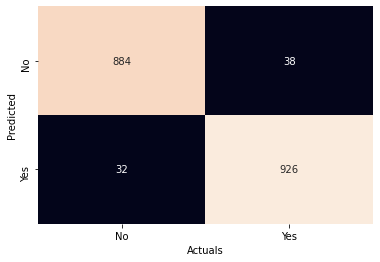

In [117]:
conf_mat = confusion_matrix(rf_pred, y_test)
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('Actuals')
plt.ylabel('Predicted')
plt.savefig('stroke_over_rf_cm.png')

In [113]:
# Creating the feature importances dataframe
feature_importance = np.array(rf.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})

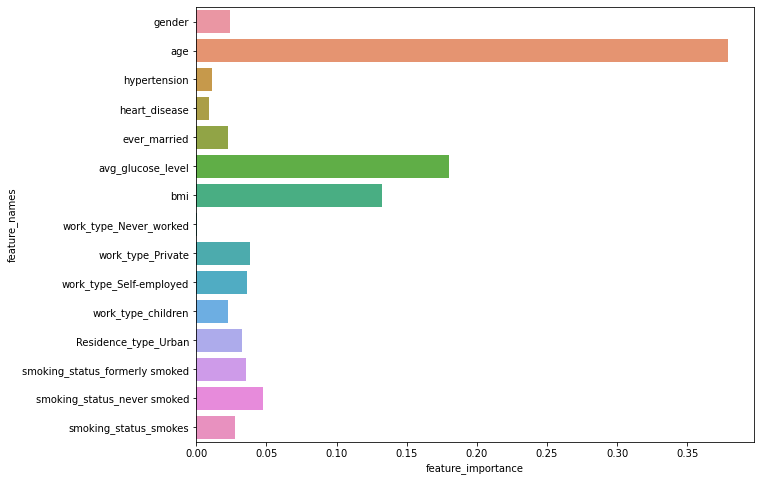

In [118]:
plt.figure(figsize=(10,8))
sns.barplot(x=feat_imp['feature_importance'], y=feat_imp['feature_names'])
plt.savefig('stroke_feature_imp.png')

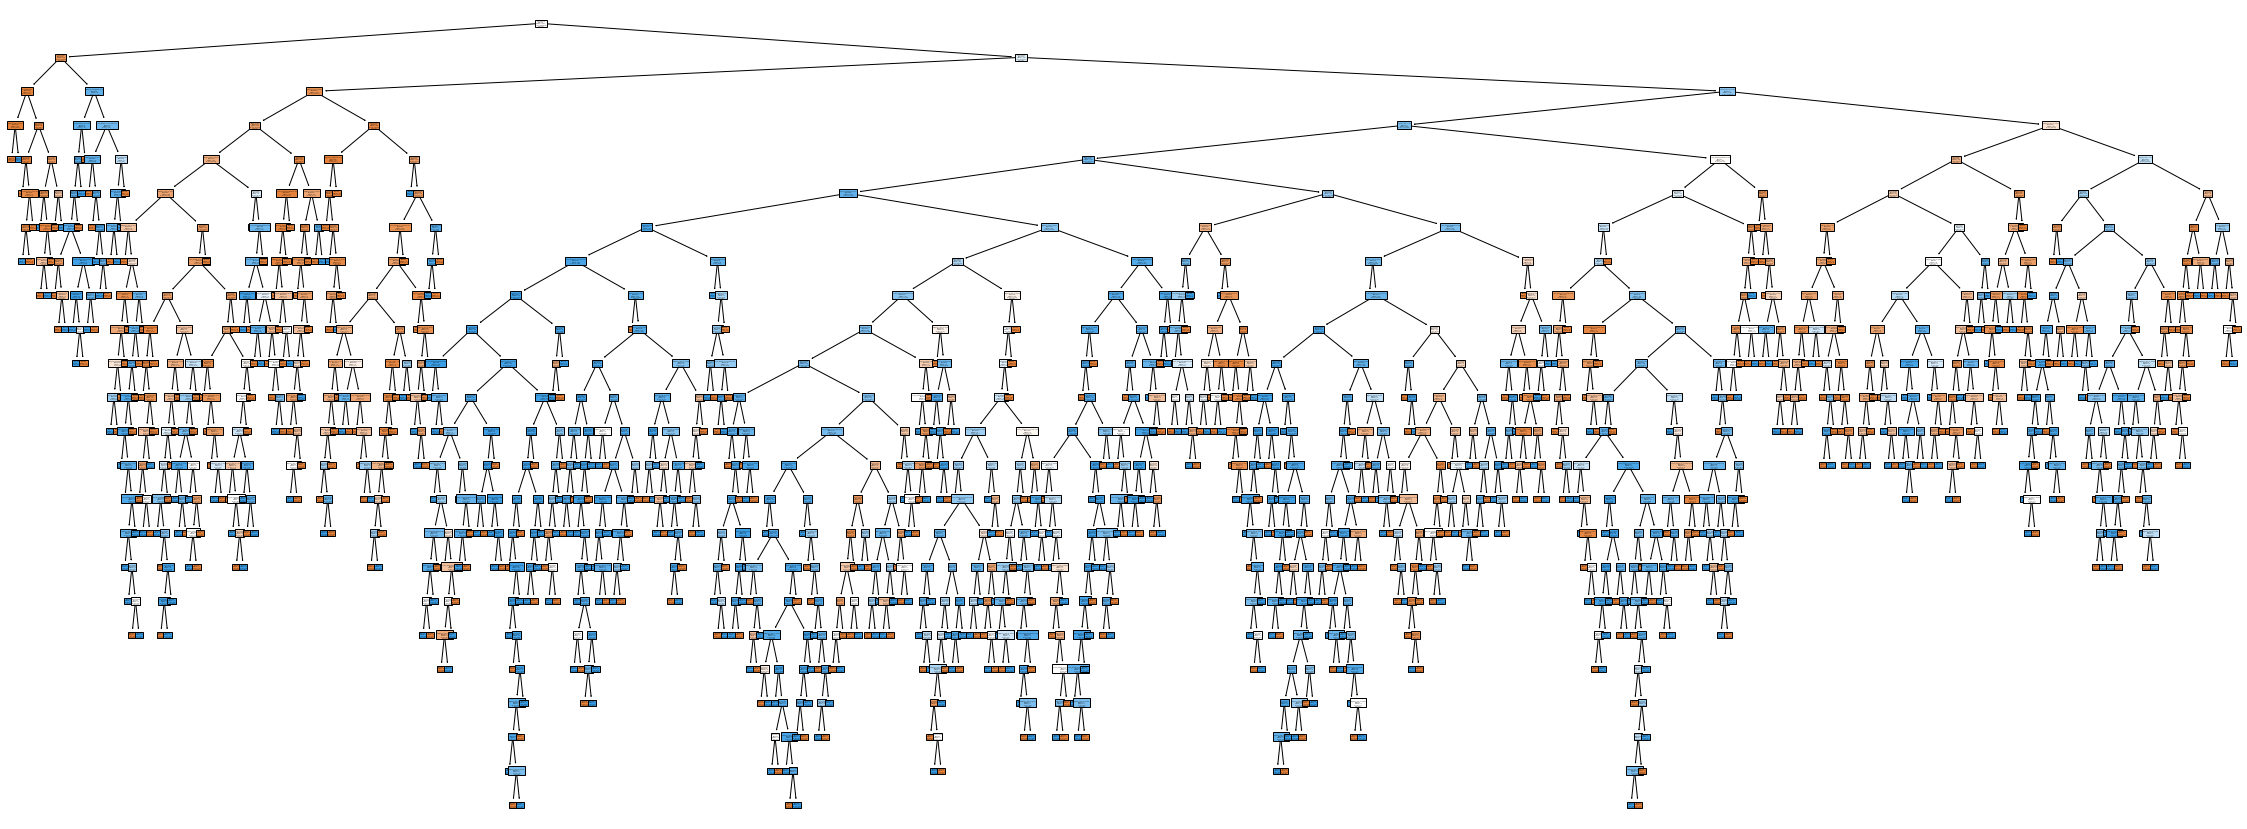

In [119]:
from sklearn import tree

fn = df.columns
cn = ["Yes","No"]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,15))

tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.savefig('stroke_over_tree.png')

In [130]:
pred_prob1 = lr.predict_proba(X_test)
pred_prob2 = dt.predict_proba(X_test)
pred_prob3 = knn.predict_proba(X_test)
pred_prob4 = rf.predict_proba(X_test)

In [131]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [133]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])

print(auc_score1)
print(auc_score2)
print(auc_score3)
print(auc_score4)

0.9447035807607136
0.9318695402116666
0.9564841567075297
0.9930350196314629


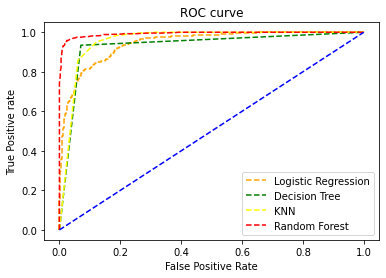

In [137]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()
fig.savefig('multiple_roc_curve.png')

After sampling, random forest leads to the best results in terms of metrics as we can see with the ROC curve and a F1 score of .96 